<a href="https://colab.research.google.com/github/sq254/Point-of-Sale-Terminal/blob/main/graduation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.26153846153846155
Confusion Matrix:
[[1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 2 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0 0 0]
 [0 1 2 2 4 4 4 0 0 0 0 0 0 0]
 [1 0 0 1 6 9 4 3 1 0 0 0 0 0]
 [0 0 0 0 1 4 3 4 3 1 0 0 0 0]
 [0 0 0 0 0 3 3 5 1 1 0 0 0 0]
 [0 0 0 0 0 0 3 5 1 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 3 3 3 1 0 0]
 [0 0 0 0 0 0 0 0 1 3 2 2 1 0]
 [0 0 0 0 0 0 0 0 0 0 2 1 2 0]
 [0 0 0 0 0 0 0 0 0 0 4 2 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         1
           8       0.60      0.43      0.50         7
           9       0.20      0.20      0.20         5
          10       0.24      0.24      0.24        17
          11       0.41      0.36      0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

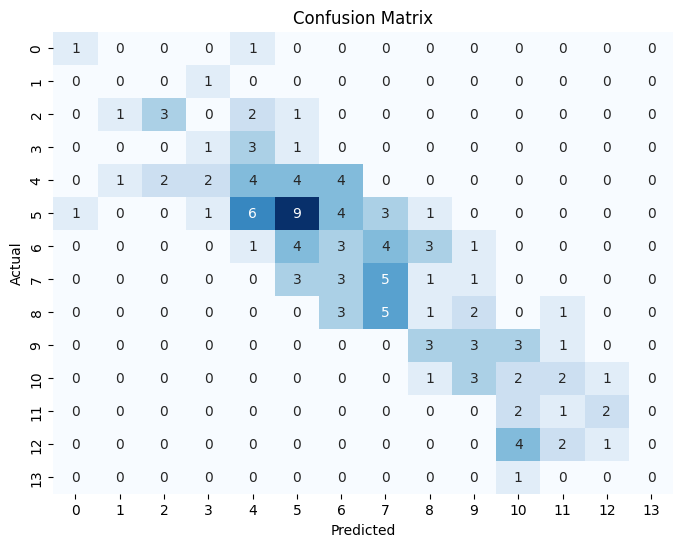

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
file_path = "/content/drive/MyDrive/student-por.csv"
data = pd.read_csv(file_path)

# Identify features (X) and target variable (y)
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                         'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

target = 'G3'

# Identify features (X) and target variable (y)
X = data[categorical_features + numerical_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

